In [1]:
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

from models import Autoencoder
from utils import train_autoencoder, load_mnist, Missingness
from utils.plotting import plot_ae_reconstructions

In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
missingness = Missingness()

In [3]:
training_data, testing_data = load_mnist()

train_loader = DataLoader(training_data, batch_size=128, shuffle=True)
test_loader = DataLoader(testing_data, batch_size=128, shuffle=True)

In [4]:
corruption_type = "mcar"
corruption_kwargs = {"missing_rate": 0.2}

In [5]:
model = Autoencoder(input_dim=784, latent_dim=10).to(device)
optimizer = optim.Adam(model.parameters(), lr=1e-3)
loss_fn = nn.MSELoss()

In [6]:
losses = train_autoencoder(
    model=model,
    train_loader=train_loader,
    optimizer=optimizer,
    loss_fn=loss_fn,
    epochs=20,
    missingness=missingness,
    corruption_type=corruption_type,
    device=device,
    **corruption_kwargs
)

Epoch 10/20: average loss = 0.0134
Epoch 20/20: average loss = 0.0116


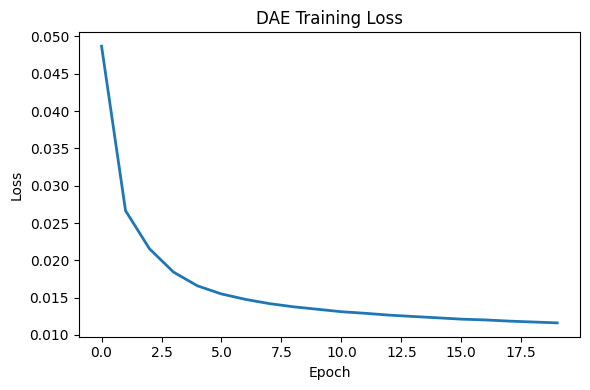

In [7]:
plt.figure(figsize=(6,4))
plt.plot(losses, linewidth=2)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("DAE Training Loss")
plt.tight_layout()
plt.show()

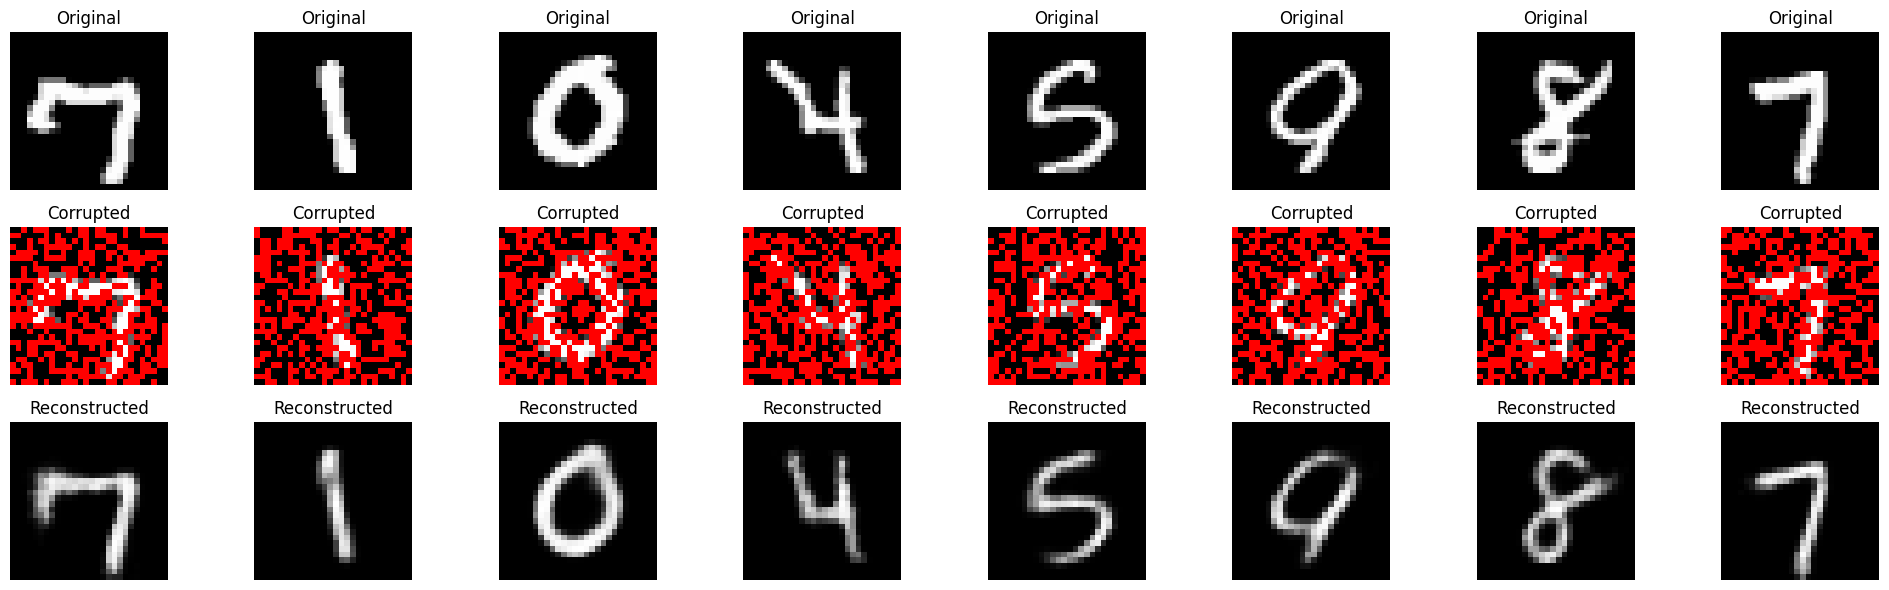

In [8]:
plot_ae_reconstructions(
    model,
    training_data,
    n=8,
    missingness=missingness,
    corruption_type="mcar",
    missing_rate=0.5,
)